In [1]:
import numpy as np
import pandas as pd
import lightgbm as ltb
import time
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
#ltb.LGBMRegressor
#ctb.CatBoostRegressor

In [3]:
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("train.csv")
ID = data['id']

#Drop unnecessary columns
data = data.iloc[:,1:]

In [5]:
data['log_loss'] = np.log(data['loss'])

In [6]:
seed = 7
test_size = 0.2

In [12]:
n_data = 50000

cont_X = data.iloc[0:n_data, 116:130]
cat_X = data.iloc[0:n_data, 0:116]
X = data.iloc[0:n_data, :130]

Y = data.iloc[0:n_data, 130:131]
log_Y = data.iloc[0:n_data, 131:132]

In [13]:
#Dummies encoding of categorical data - base

dummies_X = np.array(pd.get_dummies(cat_X))
new_X = np.c_[dummies_X, cont_X]

start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(dummies_X, log_Y, test_size=test_size, random_state=seed)

y_train = y_train.iloc[:,0]

model = ltb.LGBMRegressor()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(np.exp(y_pred), np.exp(y_test))
print("Mean absolute error : " + str(mae))

Time = time.time() - start_time
print("-- " + str(Time) + " seconds --")

base_pred = y_pred

Mean absolute error : 1186.352544165588
-- 4.36400008202 seconds --


In [ ]:
#Dummies encoding of categorical data - optimal

dummies_X = np.array(pd.get_dummies(cat_X))
new_X = np.c_[dummies_X, cont_X]

start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(new_X, log_Y, test_size=test_size, random_state=seed)

y_train = y_train.iloc[:,0]

model = ltb.LGBMRegressor(colsample_bytree=0.8411367740809124, max_depth=15,
                          min_child_samples=63, min_split_gain=0.06616105626244219,
                          num_leaves=138, subsample=0.775858544114288)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(np.exp(y_pred), np.exp(y_test))
print("Mean absolute error : " + str(mae))

Time = time.time() - start_time
print("-- " + str(Time) + " seconds --")

optimal_pred = y_pred

In [10]:
compare = np.c_[np.exp(base_pred), np.exp(optimal_pred), np.exp(y_test)]
df = pd.DataFrame(compare)
df.columns = ["Predicted base", "Predicted optimal", "Actual Loss"]
df

,Predicted base,Predicted optimal,Actual Loss
0,2832.785844,2848.065610,3827.35
1,2399.047326,2301.497676,678.62
2,1746.402134,1666.812809,1533.51
3,1303.220014,1328.120408,2650.19
4,1683.801369,1741.233994,3656.02
5,2215.386101,2321.431261,1876.09
6,2901.323725,3187.601260,4227.60
7,1925.151614,1933.389432,3858.52
8,1034.719142,1031.978293,466.91
9,2010.713643,2202.164871,852.75


In [11]:
stepsize = 10000

In [12]:
#Base

T_b = []
MAE_b = []
N_b = []




for i in range(1, 19):
    print(i)
    n_data = i*stepsize
    N_b.append(n_data)
    
    cont_X = data.iloc[0:n_data, 116:130]
    cat_X = data.iloc[0:n_data, 0:116]
    X = data.iloc[0:n_data, :130]

    Y = data.iloc[0:n_data, 130:131]
    
    dummies_X = np.array(pd.get_dummies(cat_X))
    new_X = np.c_[dummies_X, cont_X]

    start_time = time.time()

    X_train, X_test, y_train, y_test = train_test_split(new_X, Y, test_size=test_size, random_state=seed)

    y_train = y_train.iloc[:,0]
    
    model = ltb.LGBMRegressor()
    
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_pred, y_test)
    MAE_b.append(mae)

    Time = time.time() - start_time
    T_b.append(Time)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [13]:
#Optimal

T_o = []
MAE_o = []
N_o = []




for i in range(1, 19):
    print(i)
    n_data = i*stepsize
    N_o.append(n_data)
    
    cont_X = data.iloc[0:n_data, 116:130]
    cat_X = data.iloc[0:n_data, 0:116]
    X = data.iloc[0:n_data, :130]

    Y = data.iloc[0:n_data, 130:131]
    
    dummies_X = np.array(pd.get_dummies(cat_X))
    new_X = np.c_[dummies_X, cont_X]

    start_time = time.time()

    X_train, X_test, y_train, y_test = train_test_split(new_X, Y, test_size=test_size, random_state=seed)

    y_train = y_train.iloc[:,0]
    
    model = ltb.LGBMRegressor(colsample_bytree=0.8411367740809124, max_depth=15, min_child_samples=63,
                              min_split_gain=0.06616105626244219, num_leaves=138, subsample=0.775858544114288)
    
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_pred, y_test)
    MAE_o.append(mae)

    Time = time.time() - start_time
    T_o.append(Time)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


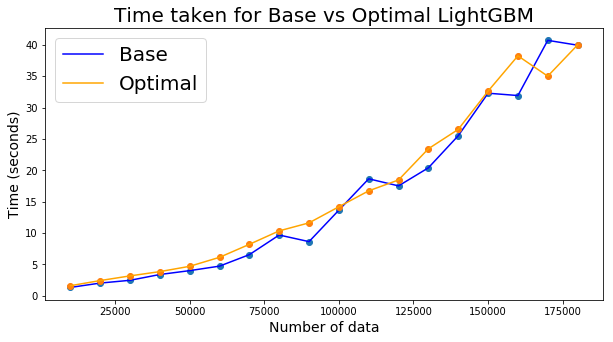

In [14]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(N_b, T_b, 'o')
ax.plot(N_b, T_b, 'blue', label = 'Base')
ax.plot(N_o, T_o, 'o')
ax.plot(N_o, T_o, 'orange', label = 'Optimal')
ax.set_title('Time taken for Base vs Optimal LightGBM', size = 20)
ax.set_xlabel('Number of data',fontsize = 14 )
ax.set_ylabel('Time (seconds)',fontsize = 14)
ax.legend(prop={'size': 20})
plt.show()

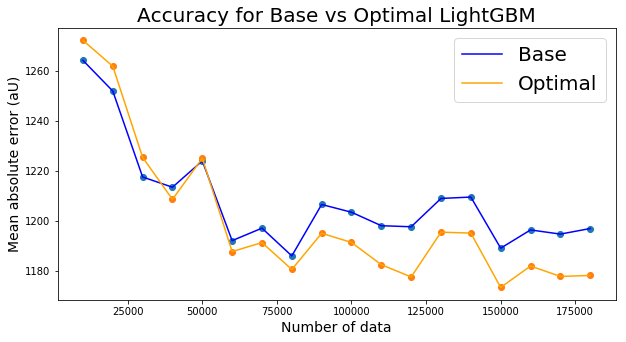

In [15]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(N_b, MAE_b, 'o')
ax.plot(N_b, MAE_b, 'blue', label = 'Base')
ax.plot(N_o, MAE_o, 'o')
ax.plot(N_o, MAE_o, 'orange', label = 'Optimal')
ax.set_title('Accuracy for Base vs Optimal LightGBM', size = 20)
ax.set_xlabel('Number of data', fontsize = 14 )
ax.set_ylabel('Mean absolute error (aU)',fontsize = 14)
ax.legend(prop={'size': 20})
plt.show()